In [1]:
import numpy as npy, os, matplotlib.pyplot as plt

In [2]:
cd ../../ImageSets/

/home/tanmay/Research/Code/HierarchicalTaskRL/ImageSets


In [3]:
images = npy.load("NEW350BINLABS.npy")
images[images==-1]=0.

In [4]:
def infogain(y,a,l):
#     if a==1:
#         s1=y[:l,:]
#         s2=y[l:,:]        
#     if a==0:
#         s1=y[:,:l]
#         s2=y[:,l:]
    if a==0:
        s1=y[:l,:]
        s2=y[l:,:]        
    if a==1:
        s1=y[:,:l]
        s2=y[:,l:]

    ysize = y.shape[0]*y.shape[1]
    ps1 = float( s1.shape[0]*s1.shape[1])/ysize
    ps2 = float(s2.shape[0]*s2.shape[1])/ysize
    return entropy(y)-(ps1*entropy(s1)+ps2*entropy(s2))

In [5]:
def entropy(y):     
    nones = npy.count_nonzero(y)
    ysize = y.shape[0]*y.shape[1]    
    nzeros = ysize-nones
    pz = float(nzeros)/ysize
    po = float(nones)/ysize
    if pz==0 or po==0: 
        return 0.                
    return -(pz*npy.log2(pz)+po*npy.log2(po))  

In [6]:
def bestsplit(x):
    maxval = -1           
    chosen_a = -1                             
    chosen_l = -1                                       
    print("Shape of image:",x.shape)
    for a_val in range(2):         
        if a_val==0:
            limval = x.shape[0]-1
        if a_val==1:
            limval = x.shape[1]-1
        for l_val in range(1,limval):
            
            ig = infogain(x,a_val,l_val)   
            print(a_val,l_val,ig,limval, chosen_a,chosen_l, maxval)
            if ig>maxval:            
                maxval=ig                          
                chosen_a = a_val                  
                chosen_l = l_val   
    if maxval==0:
        print("No entropy reducing splits.")
        return 1
    return chosen_a,chosen_l

In [7]:
def return_splits(x,a,l):
    if a==0:
        s1=x[:l,:]
        s2=x[l:,:]
    if a==1:
        s1=x[:,:l]
        s2=x[:,l:]
    return s1,s2

In [8]:
bestsplit(images[1])

Shape of image: (256, 256)
0 1 0.0013053825604092406 255 -1 -1 -1
0 2 0.0026165400031460395 255 0 1 0.0013053825604092406
0 3 0.0039335238837179265 255 0 2 0.0026165400031460395
0 4 0.005256386454281614 255 0 3 0.0039335238837179265
0 5 0.006585180676307756 255 0 4 0.005256386454281614
0 6 0.00791996023353747 255 0 5 0.006585180676307756
0 7 0.009260779545235853 255 0 6 0.00791996023353747
0 8 0.010607693779753125 255 0 7 0.009260779545235853
0 9 0.011960758868401311 255 0 8 0.010607693779753125
0 10 0.013320031519655884 255 0 9 0.011960758868401311
0 11 0.014685569233688467 255 0 10 0.013320031519655884
0 12 0.016057430317245158 255 0 11 0.014685569233688467
0 13 0.017435673898876902 255 0 12 0.016057430317245158
0 14 0.018820359944531906 255 0 13 0.017435673898876902
0 15 0.020211549273521978 255 0 14 0.018820359944531906
0 16 0.021609303574873784 255 0 15 0.020211549273521978
0 17 0.02301368542407456 255 0 16 0.021609303574873784
0 18 0.024424758300225058 255 0 17 0.0230136854240745

1 24 0.033035380328387376 255 0 34 0.047967495551791806
1 25 0.03449514751317817 255 0 34 0.047967495551791806
1 26 0.03596214829040345 255 0 34 0.047967495551791806
1 27 0.03743645511701643 255 0 34 0.047967495551791806
1 28 0.03891814155035789 255 0 34 0.047967495551791806
1 29 0.04040728227067936 255 0 34 0.047967495551791806
1 30 0.04190395310424655 255 0 34 0.047967495551791806
1 31 0.043408231047045054 255 0 34 0.047967495551791806
1 32 0.04492019428910499 255 0 34 0.047967495551791806
1 33 0.046439922239463804 255 0 34 0.047967495551791806
1 34 0.047967495551791806 255 0 34 0.047967495551791806
1 35 0.04950299615069431 255 0 34 0.047967495551791806
1 36 0.0510465072587204 255 1 35 0.04950299615069431
1 37 0.052598113424094706 255 1 36 0.0510465072587204
1 38 0.05415790054919889 255 1 37 0.052598113424094706
1 39 0.05572595591982776 255 1 38 0.05415790054919889
1 40 0.05730236823524326 255 1 39 0.05572595591982776
1 41 0.05888722763905607 255 1 40 0.05730236823524326
1 42 0.06048

(1, 65)

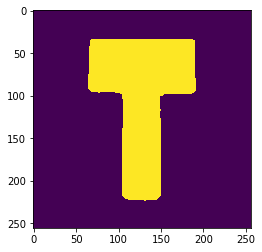

In [9]:
plt.imshow(images[1])
plt.show()

In [11]:
a,l = bestsplit(images[1])
s1,s2 = return_splits(images[1],a,l)

Shape of image: (256, 256)
0 1 0.0013053825604092406 255 -1 -1 -1
0 2 0.0026165400031460395 255 0 1 0.0013053825604092406
0 3 0.0039335238837179265 255 0 2 0.0026165400031460395
0 4 0.005256386454281614 255 0 3 0.0039335238837179265
0 5 0.006585180676307756 255 0 4 0.005256386454281614
0 6 0.00791996023353747 255 0 5 0.006585180676307756
0 7 0.009260779545235853 255 0 6 0.00791996023353747
0 8 0.010607693779753125 255 0 7 0.009260779545235853
0 9 0.011960758868401311 255 0 8 0.010607693779753125
0 10 0.013320031519655884 255 0 9 0.011960758868401311
0 11 0.014685569233688467 255 0 10 0.013320031519655884
0 12 0.016057430317245158 255 0 11 0.014685569233688467
0 13 0.017435673898876902 255 0 12 0.016057430317245158
0 14 0.018820359944531906 255 0 13 0.017435673898876902
0 15 0.020211549273521978 255 0 14 0.018820359944531906
0 16 0.021609303574873784 255 0 15 0.020211549273521978
0 17 0.02301368542407456 255 0 16 0.021609303574873784
0 18 0.024424758300225058 255 0 17 0.0230136854240745

1 94 0.051911350041224935 255 1 65 0.09972119191852635
1 95 0.05116609002224659 255 1 65 0.09972119191852635
1 96 0.050445453037246235 255 1 65 0.09972119191852635
1 97 0.04971402654933965 255 1 65 0.09972119191852635
1 98 0.049005801237076096 255 1 65 0.09972119191852635
1 99 0.04831964667890887 255 1 65 0.09972119191852635
1 100 0.04765451308108881 255 1 65 0.09972119191852635
1 101 0.04700942371453243 255 1 65 0.09972119191852635
1 102 0.04635159590288418 255 1 65 0.09972119191852635
1 103 0.04568142876851988 255 1 65 0.09972119191852635
1 104 0.04503033735161677 255 1 65 0.09972119191852635
1 105 0.043212718402341865 255 1 65 0.09972119191852635
1 106 0.04006951669956593 255 1 65 0.09972119191852635
1 107 0.03617141646589872 255 1 65 0.09972119191852635
1 108 0.0325073069671582 255 1 65 0.09972119191852635
1 109 0.029066749753352994 255 1 65 0.09972119191852635
1 110 0.025862995178871584 255 1 65 0.09972119191852635
1 111 0.022884090157734738 255 1 65 0.09972119191852635
1 112 0.02

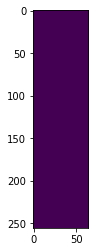

In [12]:
plt.imshow(s1)
plt.show()

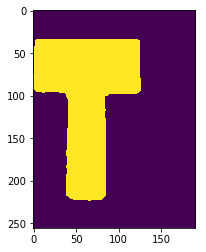

In [13]:
plt.imshow(s2)
plt.show()

In [14]:
a,l = bestsplit(s2)
s1,s2 = return_splits(s2,a,l)

Shape of image: (256, 191)
0 1 0.0018288646153147292 255 -1 -1 -1
0 2 0.0036662248718440926 255 0 1 0.0018288646153147292
0 3 0.0055121607756731805 255 0 2 0.0036662248718440926
0 4 0.007366753478469379 255 0 3 0.0055121607756731805
0 5 0.009230085299651636 255 0 4 0.007366753478469379
0 6 0.01110223974909963 255 0 5 0.009230085299651636
0 7 0.012983301550425819 255 0 6 0.01110223974909963
0 8 0.01487335666482148 255 0 7 0.012983301550425819
0 9 0.016772492315498044 255 0 8 0.01487335666482148
0 10 0.01868079701273828 255 0 9 0.016772492315498044
0 11 0.020598360579579755 255 0 10 0.01868079701273828
0 12 0.022525274178146426 255 0 11 0.020598360579579755
0 13 0.024461630336650608 255 0 12 0.022525274178146426
0 14 0.02640752297708482 255 0 13 0.024461630336650608
0 15 0.028363047443625167 255 0 14 0.02640752297708482
0 16 0.030328300531769936 255 0 15 0.028363047443625167
0 17 0.032303380518233116 255 0 16 0.030328300531769936
0 18 0.03428838719162064 255 0 17 0.032303380518233116
0 1

1 109 0.1619577950883141 190 1 108 0.16084753368194082
1 110 0.16315951706025733 190 1 109 0.1619577950883141
1 111 0.16445970629194984 190 1 110 0.16315951706025733
1 112 0.1658664832533463 190 1 111 0.16445970629194984
1 113 0.1673893387185571 190 1 112 0.1658664832533463
1 114 0.16903947584987045 190 1 113 0.1673893387185571
1 115 0.17083027661445238 190 1 114 0.16903947584987045
1 116 0.17277795454140654 190 1 115 0.17083027661445238
1 117 0.17490249712948158 190 1 116 0.17277795454140654
1 118 0.17722907871268445 190 1 117 0.17490249712948158
1 119 0.17979027985712792 190 1 118 0.17722907871268445
1 120 0.18262978698886256 190 1 119 0.17979027985712792
1 121 0.1858090620036864 190 1 120 0.18262978698886256
1 122 0.18942074757593208 190 1 121 0.1858090620036864
1 123 0.1934866945048651 190 1 122 0.18942074757593208
1 124 0.19812030133633285 190 1 123 0.1934866945048651
1 125 0.20424545313232922 190 1 124 0.19812030133633285
1 126 0.20353240492267866 190 1 125 0.20424545313232922
1 

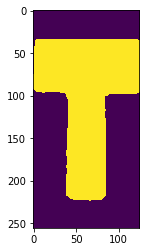

In [15]:
plt.imshow(s1)
plt.show()

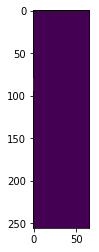

In [16]:
plt.imshow(s2)
plt.show()

In [17]:
a,l = bestsplit(s1)
s1,s2 = return_splits(s1,a,l)

Shape of image: (256, 125)
0 1 0.003098885094872217 255 -1 -1 -1
0 2 0.006214026029630726 255 0 1 0.003098885094872217
0 3 0.009345598641384734 255 0 2 0.006214026029630726
0 4 0.0124937817067714 255 0 3 0.009345598641384734
0 5 0.01565875700937458 255 0 4 0.0124937817067714
0 6 0.018840709409134848 255 0 5 0.01565875700937458
0 7 0.022039826913812566 255 0 6 0.018840709409134848
0 8 0.025256300752585337 255 0 7 0.022039826913812566
0 9 0.028490325451857368 255 0 8 0.025256300752585337
0 10 0.03174209891335911 255 0 9 0.028490325451857368
0 11 0.03501182249462664 255 0 10 0.03174209891335911
0 12 0.03829970109194902 255 0 11 0.03501182249462664
0 13 0.04160594322587341 255 0 12 0.03829970109194902
0 14 0.044930761129370445 255 0 13 0.04160594322587341
0 15 0.04827437083875785 255 0 14 0.044930761129370445
0 16 0.051636992287490524 255 0 15 0.04827437083875785
0 17 0.05501884940292745 255 0 16 0.051636992287490524
0 18 0.058420170206192834 255 0 17 0.05501884940292745
0 19 0.06184118691

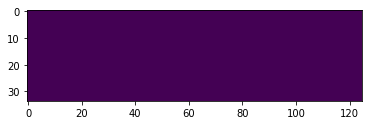

In [18]:
plt.imshow(s1)
plt.show()

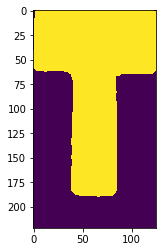

In [19]:
plt.imshow(s2)
plt.show()

In [20]:
a,l = bestsplit(s2)
s1,s2 = return_splits(s2,a,l)

Shape of image: (222, 125)
0 1 0.0035862844062324317 221 -1 -1 -1
0 2 0.007732927612751461 221 0 1 0.0035862844062324317
0 3 0.01193056924007696 221 0 2 0.007732927612751461
0 4 0.016164895985307903 221 0 3 0.01193056924007696
0 5 0.02043270625776117 221 0 4 0.016164895985307903
0 6 0.024733093352729774 221 0 5 0.02043270625776117
0 7 0.029065889543490764 221 0 6 0.024733093352729774
0 8 0.033431230785014976 221 0 7 0.029065889543490764
0 9 0.038043774637669725 221 0 8 0.033431230785014976
0 10 0.042694246088980314 221 0 9 0.038043774637669725
0 11 0.047382232914330635 221 0 10 0.042694246088980314
0 12 0.05210760141659154 221 0 11 0.047382232914330635
0 13 0.056870405558747006 221 0 12 0.05210760141659154
0 14 0.06167083152947306 221 0 13 0.056870405558747006
0 15 0.06650916257013306 221 0 14 0.06167083152947306
0 16 0.07138575593244145 221 0 15 0.06650916257013306
0 17 0.07630102738663602 221 0 16 0.07138575593244145
0 18 0.08125544058923562 221 0 17 0.07630102738663602
0 19 0.086249

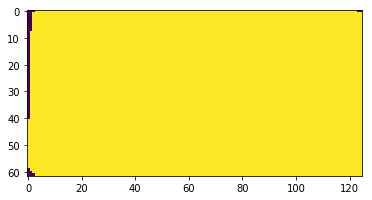

In [21]:
plt.imshow(s1)
plt.show()

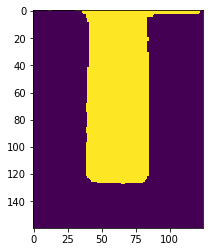

In [22]:
plt.imshow(s2)
plt.show()

In [23]:
a,l = bestsplit(s2)
s1,s2 = return_splits(s2,a,l)

Shape of image: (160, 125)
0 1 0.0044180010062609965 159 -1 -1 -1
0 2 0.007589032607802526 159 0 1 0.0044180010062609965
0 3 0.010579142015382015 159 0 2 0.007589032607802526
0 4 0.009460263380316691 159 0 3 0.010579142015382015
0 5 0.008840443199571224 159 0 3 0.010579142015382015
0 6 0.00818924388675224 159 0 3 0.010579142015382015
0 7 0.007689892687469002 159 0 3 0.010579142015382015
0 8 0.007342918041995161 159 0 3 0.010579142015382015
0 9 0.007097820822409062 159 0 3 0.010579142015382015
0 10 0.006864735573009706 159 0 3 0.010579142015382015
0 11 0.00669059584468612 159 0 3 0.010579142015382015
0 12 0.006561150355412715 159 0 3 0.010579142015382015
0 13 0.0064665301935763475 159 0 3 0.010579142015382015
0 14 0.006399679391649649 159 0 3 0.010579142015382015
0 15 0.00635541787974514 159 0 3 0.010579142015382015
0 16 0.006329857174105835 159 0 3 0.010579142015382015
0 17 0.006320022527591451 159 0 3 0.010579142015382015
0 18 0.00632360091342532 159 0 3 0.010579142015382015
0 19 0.00

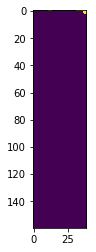

In [24]:
plt.imshow(s1)
plt.show()

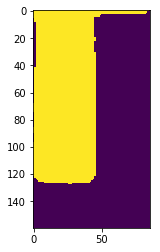

In [25]:
plt.imshow(s2)
plt.show()

In [26]:
a,l = bestsplit(s2)
s1,s2 = return_splits(s2,a,l)

Shape of image: (160, 86)
0 1 0.007221131485456778 159 -1 -1 -1
0 2 0.014039059236185092 159 0 1 0.007221131485456778
0 3 0.020505147863684847 159 0 2 0.014039059236185092
0 4 0.01677214427012319 159 0 3 0.020505147863684847
0 5 0.015282373443961106 159 0 3 0.020505147863684847
0 6 0.013926669048105134 159 0 3 0.020505147863684847
0 7 0.012955881679922121 159 0 3 0.020505147863684847
0 8 0.012312119297993473 159 0 3 0.020505147863684847
0 9 0.011874104135248587 159 0 3 0.020505147863684847
0 10 0.011463482967214333 159 0 3 0.020505147863684847
0 11 0.011165034601234636 159 0 3 0.020505147863684847
0 12 0.010949577901769425 159 0 3 0.020505147863684847
0 13 0.010797557342869246 159 0 3 0.020505147863684847
0 14 0.01069534814854789 159 0 3 0.020505147863684847
0 15 0.010633154921116494 159 0 3 0.020505147863684847
0 16 0.010603750710099114 159 0 3 0.020505147863684847
0 17 0.010601686657823572 159 0 3 0.020505147863684847
0 18 0.010622778292065926 159 0 3 0.020505147863684847
0 19 0.0106

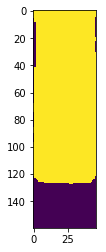

In [27]:
plt.imshow(s1)

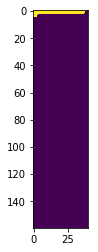

In [29]:
plt.imshow(s2)